# Shapely: computing with geometric objects

## Preparation

Load the required modules.

In [61]:
import matplotlib.pyplot as plt
from shapely.geometry import Point, MultiPoint
from shapely.geometry import LineString, MultiLineString, LinearRing
from shapely.geometry import Polygon, MultiPolygon
from shapely.geometry import CAP_STYLE, JOIN_STYLE
%matplotlib inline

## Shapes and spatial analysis

Create a simple polygon, represented as a `Polygon`.  This shape could also be represented as a `LinearRing`.

In [4]:
polygon1 = Polygon([(1.0, 1.0), (1.0, 3.0), (3.0, 2.0), (3.0, 1.0)])

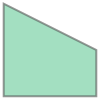

In [5]:
polygon1

In [6]:
polygon1.wkt

'POLYGON ((1 1, 1 3, 3 2, 3 1, 1 1))'

Create a second polygon with a hole.

In [7]:
polygon2 = Polygon([(1.5, 1.5), (1.5, 4.0), (4.5, 3.0), (4.5, 1.0)],
                   [[(2.0, 2.0), (2.5, 2.5), (2.8, 2.0)]])

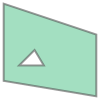

In [8]:
polygon2

Compute the area of the polygon.

In [9]:
polygon2.area

6.55

Compute the intersection between the two polygons.

In [10]:
intersection = polygon1.intersection(polygon2)

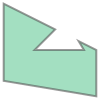

In [11]:
intersection

In [12]:
intersection.wkt

'POLYGON ((1.5 2.75, 2.333333333333333 2.333333333333333, 2 2, 2.8 2, 2.714285714285714 2.142857142857143, 3 2, 3 1.25, 1.5 1.5, 1.5 2.75))'

Compute the union of the two polygons.

In [13]:
union = polygon1.union(polygon2)

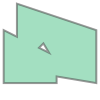

In [14]:
union

In [15]:
union.wkt

'POLYGON ((1 1, 1 3, 1.5 2.75, 1.5 4, 4.5 3, 4.5 1, 3 1.25, 3 1, 1 1), (2.333333333333333 2.333333333333333, 2.714285714285714 2.142857142857143, 2.5 2.5, 2.333333333333333 2.333333333333333))'

Check whether the area of the union is the sum of the areas of the polygons minus the area of their intersection.

In [16]:
polygon1.area + polygon2.area - intersection.area

8.202380952380953

In [17]:
union.area

8.202380952380953

Create a point.

In [18]:
point1 = Point((2.1, 2.1))

Check whether the point lies within the first polygon.

In [19]:
point1.within(polygon1)

True

For the second polygon, the point is within the hole.

In [20]:
point1.within(polygon2)

False

Create a horizontal line.

In [21]:
line1 = LineString([(0.5, 2.1), (5.0, 2.1)])

Compute the intersection between the line and the second polygon.

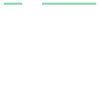

In [22]:
line2 = polygon2.intersection(line1)
line2

In [23]:
line2[0].coords.xy

(array('d', [1.5, 2.1]), array('d', [2.1, 2.1]))

In [24]:
line2[1].coords.xy

(array('d', [2.7399999999999998, 4.5]), array('d', [2.1, 2.1]))

In [25]:
type(line2)

shapely.geometry.multilinestring.MultiLineString

Check whether the line intersects with the first polygon.

In [26]:
line1.intersects(polygon1)

True

A line can be turned into an object with a finite width by creating a buffer around it of the specifie size. The result is a `Polygon`.

### Collections of objects

Create two lines, and a `MultiLineString` out of them.

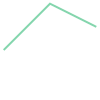

In [27]:
line3 = LineString([(0.0, 0.0), (1.0, 1.0), (2.0, 0.5)])
line3

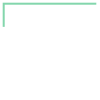

In [28]:
line4 = LineString([(1.5, 0.5), (-0.5, 0.5), (-0.5, 0.0)])
line4

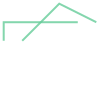

In [29]:
mline = MultiLineString([line3, line4])
mline

Create two polygons, and a new `MultiPolygon` containing them.

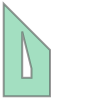

In [30]:
polygon3 = Polygon([(1.0, 1.0), (1.0, 3.0), (2.0, 2.0), (2.0, 1.0)],
                   [[(1.4, 1.4), (1.4, 2.4), (1.6, 1.6), (1.6, 1.4)]])
polygon3

In [31]:
line4_outer = LinearRing([(3.0, 2.0), (3.0, 5.0), (6.0, 5.0), (6.0, 2.0)])

In [32]:
line4_inner1 = LinearRing([(3.5, 2.5), (3.5, 4.5), (4.5, 4.5), (4.5, 2.5)])

In [33]:
line4_inner2 = LinearRing([(5.0, 2.5), (5.0, 4.5), (5.5, 4.5), (5.5, 2.5)])

In [34]:
polygon4 = Polygon(line4_outer, [line4_inner1, line4_inner2])

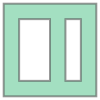

In [35]:
polygon4

In [36]:
multi_polygon = MultiPolygon([polygon3, polygon4])

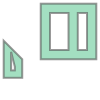

In [37]:
multi_polygon

## Predicates

Create an invalid `LinearRing`.

In [38]:
ring = LinearRing([(0.0, 0.0), (1.0, 1.0), (2.0, 0.5), (0.0, 0.5)])

In [39]:
ring.is_valid

Ring Self-intersection at or near point 0.5 0.5


False

Create a `Polygon` with a hole and check the semantics of contains.

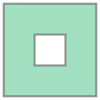

In [40]:
large_polygon = Polygon([(-3.0, -3.0), (-3.0, 3.0), (3.0, 3.0), (3.0, -3.0)],
                        [[(-1.0, -1.0), (-1.0, 1.0), (1.0, 1.0), (1.0, -1.0)]])
large_polygon

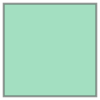

In [41]:
small_polygon = Polygon([(-2.0, -2.0), (-2.0, 2.0), (2.0, 2.0), (2.0, -2.0)])
small_polygon

In [42]:
large_polygon.contains(small_polygon)

False

In [43]:
small_polygon.within(large_polygon)

False

In [44]:
small_polygon.crosses(large_polygon)

False

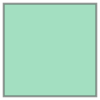

In [45]:
smaller_polygon = Polygon([(-1.0, -1.0), (-1.0, 1.0), (1.0, 1.0), (1.0, -1.0)])
smaller_polygon

In [46]:
small_polygon.contains(smaller_polygon)

True

In [47]:
smaller_polygon.within(small_polygon)

True

In [48]:
smaller_polygon.touches(large_polygon)

True

## Constructive methods

### Buffers

Buffers make 2D objects from `Point` or `LineString`.

In [49]:
line = LineString([(0.0, 1.0), (3.0, 1.0)])
buffer1 = line.buffer(0.1)

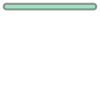

In [50]:
buffer1

In [51]:
buffer1.wkt

'POLYGON ((3 1.1, 3.009801714032956 1.09951847266722, 3.019509032201613 1.098078528040323, 3.029028467725446 1.095694033573221, 3.038268343236509 1.092387953251129, 3.0471396736826 1.088192126434836, 3.05555702330196 1.083146961230254, 3.063439328416365 1.077301045336274, 3.070710678118655 1.070710678118655, 3.077301045336274 1.063439328416365, 3.083146961230255 1.05555702330196, 3.088192126434835 1.0471396736826, 3.092387953251129 1.038268343236509, 3.095694033573221 1.029028467725446, 3.098078528040323 1.019509032201613, 3.09951847266722 1.009801714032956, 3.1 1, 3.09951847266722 0.990198285967044, 3.098078528040323 0.9804909677983872, 3.095694033573221 0.9709715322745538, 3.092387953251129 0.961731656763491, 3.088192126434835 0.9528603263174003, 3.083146961230255 0.9444429766980398, 3.077301045336274 0.9365606715836354, 3.070710678118655 0.9292893218813453, 3.063439328416365 0.9226989546637263, 3.05555702330196 0.9168530387697454, 3.0471396736826 0.9118078735651645, 3.03826834323650

Create a `MultilineString` to illustrate a buffer operation.

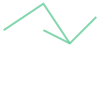

In [52]:
line1 = LineString([(0.0, 1.0), (1.0, 0.5), (2.0, 1.5)])
line2 = LineString([(1.0, 0.5), (0.0, 2.0), ((-1.5, 1.0))])
multi_line = MultiLineString([line1, line2])
multi_line

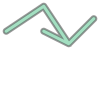

In [53]:
multi_line.buffer(0.1)

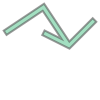

In [54]:
multi_line.buffer(0.1, cap_style=CAP_STYLE.flat, join_style=JOIN_STYLE.mitre)

### Convex hull

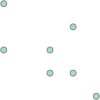

In [55]:
points = MultiPoint([(1.0, 2.0), (3.0, 1.0), (1.0, 3.0), (2.5, 1.5), (2.0, 2.0), (2.0, 1.5), (2.5, 2.5)])
points

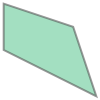

In [56]:
points.convex_hull

Convex hull of a `Polygon`.

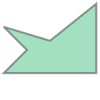

In [57]:
polygon = Polygon([(0.0, 0.0), (0.5, 0.5), (0.0, 1.0), (1.0, 0.7), (2.0, 1.5), (2.0, 0.0)])
polygon

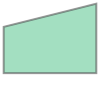

In [58]:
polygon.convex_hull

### Parallel offset

In [59]:
line = LineString([(0.0, 1.0), (1.0, 0.5), (2.0, 1.5), (3.0, -1.0)])
parallel = line.parallel_offset(0.5, 'left', join_style=JOIN_STYLE.mitre)

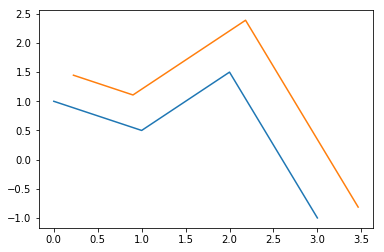

In [62]:
plt.plot([t[0] for t in line.coords], [t[1] for t in line.coords])
plt.plot([t[0] for t in parallel.coords], [t[1] for t in parallel.coords])

## Splitting a polygon

The latter can be used to split a polygon along the line by computing the difference between the polygon and the buffer created out of the line.  The result is a `MultiPolygon`.

In [63]:
split = polygon1.difference(buffer1)

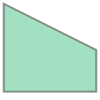

In [64]:
split

In [65]:
split[0]

TypeError: 'Polygon' object does not support indexing

In [66]:
split[1]

TypeError: 'Polygon' object does not support indexing

### Interpolation

Create a line out of two points, and use interpolation to tet a point on that line at a specified distance from the first.

In [67]:
point1 = Point((1.0, 1.0))
point2 = Point((3.0, 3.0))
line12 = LineString([point1, point2])

In [68]:
point3 = line12.interpolate(1.0)

Verify that the distance between the first and the new point is 1.

In [69]:
point1.distance(point3)

0.9999999999999999

Check whether the new point is on the line defined by the first and second point.

In [70]:
line12.contains(point3)

True

In [71]:
point4 = Point((3.1, 3.2))

In [72]:
line12.contains(point4)

False

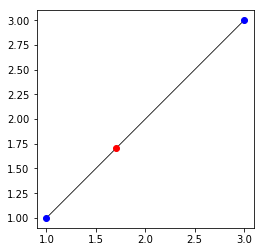

In [80]:
plt.axes().set_aspect('equal')
plt.plot([1.0, 3.0], [1.0, 3.0], 'k-', linewidth=0.8)
plt.plot([1.0, 3.0], [1.0, 3.0], 'bo')
plt.plot([point3.coords[0][0]], [point3.coords[0][1]], 'ro');

## Affine transformations

Import modules.

In [69]:
from math import cos, sin, pi
import matplotlib.pyplot as plt
from shapely import affinity
%matplotlib inline

Define a function to plot a polygon.

In [70]:
def plot_polygons(*polygons):
    plt.xlim(-10.0, 10.0)
    plt.ylim(-10.0, 10.0)
    plt.grid()
    plt.axes().set_aspect('equal')
    for polygon in polygons:
        boundary = polygon.boundary.xy
        plt.plot(boundary[0], boundary[1])

Create a rectangle to transform.

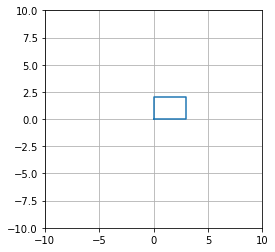

In [71]:
rectangle = Polygon([(0.0, 0.0), (0.0, 2.0), (3.0, 2.0), (3.0, 0.0)])
plot_polygons(rectangle)

Perform a rotation over 45 degrees.

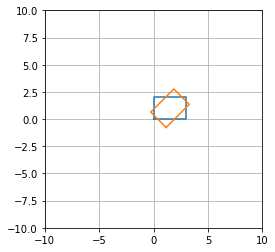

In [72]:
plot_polygons(rectangle, affinity.rotate(rectangle, 45))

Or over $\pi/4$ radians.

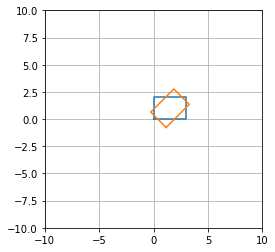

In [73]:
plot_polygons(rectangle, affinity.rotate(rectangle, pi/4, use_radians=True))

By default, the rotation's center is that of the shape to be rotated, however, it can be set explicitly.

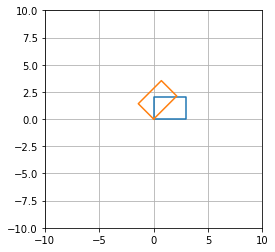

In [74]:
plot_polygons(rectangle, affinity.rotate(rectangle, 45, origin=(0.0, 0.0)))

Scale the rectangle.

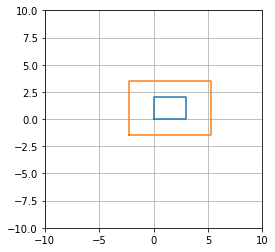

In [75]:
plot_polygons(rectangle, affinity.scale(rectangle, 2.5, 2.5))

Scale only along the $y$-axis.

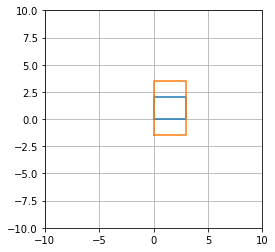

In [76]:
plot_polygons(rectangle, affinity.scale(rectangle, yfact=2.5))

Skewing the rectangle in the $x$-direction.

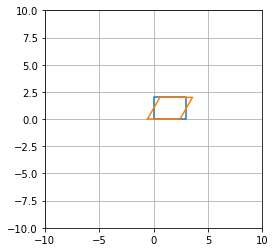

In [77]:
plot_polygons(rectangle, affinity.skew(rectangle, xs=30.0))

Skewing in both $x$ and $y$ direction.

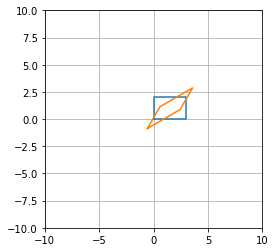

In [78]:
plot_polygons(rectangle, affinity.skew(rectangle, xs=30.0, ys=30.0))

Setting the origin explicitly for the skew.

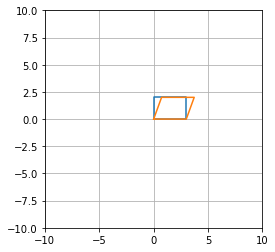

In [79]:
plot_polygons(rectangle, affinity.skew(rectangle, xs=20.0, origin=Point((0.0, 0.0))))